In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

In [2]:
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('vader_lexicon')

In [3]:
## excercise
### Read IMBD sentiments data (imdb_sentiment.csv)
url='https://bit.ly/2S2yXEd'
data=pd.read_csv(url)
data.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


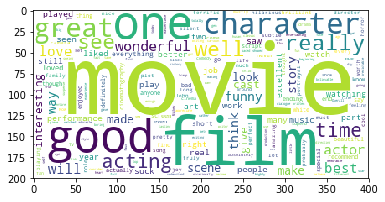

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
insincere_rows=data[data['sentiment'] == 1] 
wc= WordCloud(background_color = 'white').generate(''.join(insincere_rows['review']))
plt.imshow(wc)

In [5]:
from sklearn.model_selection import train_test_split
train ,validate  = train_test_split(data, test_size=0.20, random_state=1)
train.shape ,validate.shape

((598, 2), (150, 2))

In [6]:
import nltk

def clean_sentence(doc,stopwords,stemmer):
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
     

def clean_documents(docs_raw):
    stopwords = nltk.corpus.stopwords.words('english')
    stemmer = nltk.stem.PorterStemmer()
    docs = docs_raw.str.lower().str.replace('[^a-z ]','')
    docs_clean = docs.apply(lambda doc: clean_sentence(doc,stopwords,stemmer))
    return docs_clean

train_docs_clean = clean_documents(train['review'])
train_docs_clean.head()


487    mani continu error one user comment differ car...
652               im sorri realli cant recommend anyon  
667    charact onedimension even good guy especi bad ...
537                                           noth new  
194    think robert ryan best film portray someon lik...
Name: review, dtype: object

In [7]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer = CountVectorizer().fit(train_docs_clean) #default min_df value is 1, since data is very small
dtm =vectorizer.transform(train_docs_clean)
dtm

<598x2130 sparse matrix of type '<class 'numpy.int64'>'
	with 5385 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
dtc=DecisionTreeClassifier(max_depth = 10).fit(dtm,train['sentiment'])
validate_docs_clean = clean_documents(validate['review'])
dtm_validate =vectorizer.transform(validate_docs_clean)
print(validate_docs_clean.head())

validate_pred = dtc.predict(dtm_validate)
from sklearn.metrics import f1_score
f1_score(validate['sentiment'], validate_pred)

265                      premis film ridicul presid us  
519                            find better movi youtub  
584                   saw child tv back  stranger love  
717    time seem film anim domin disneypixar cgi mast...
90     also real treat see anthoni quinn play crazi h...
Name: review, dtype: object


0.3434343434343435

In [9]:
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB().fit(dtm,train['sentiment'])
validate_pred=model_nb.predict(dtm_validate)
f1_score(validate['sentiment'],validate_pred)

0.7730061349693252

In [10]:
vect=pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())
vect.head()

,abandon,abil,abroad,absolut,abstrus,abysm,academi,accent,acclaim,accolad,...,yet,youll,young,younger,your,youv,yun,zillion,zombi,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
vect.iloc[0].sort_values(ascending=False).head(10)#first row

one         2
joe         2
scene       2
hair        1
chang       1
error       1
configur    1
mani        1
continu     1
car         1
Name: 0, dtype: int64

In [12]:
from sklearn.metrics import accuracy_score
print(accuracy_score(validate['sentiment'],validate_pred))

0.7533333333333333


# Term frequency - Inverse Document Frequency

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer().fit(train_docs_clean)
dtm_train =tfidf_vectorizer.transform(train_docs_clean)
dtm_test =tfidf_vectorizer.transform(validate_docs_clean)

In [14]:
tfidf=pd.DataFrame(dtm_train.toarray(),columns=tfidf_vectorizer.get_feature_names())
tfidf.head()

,abandon,abil,abroad,absolut,abstrus,abysm,academi,accent,acclaim,accolad,...,yet,youll,young,younger,your,youv,yun,zillion,zombi,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
tfidf.iloc[0].sort_values(ascending=False).head(10)#before transformation one had higher freq, now it has reduced

joe          0.443970
scene        0.291439
one          0.233445
hair         0.221985
user         0.221985
facial       0.221985
error        0.221985
configur     0.221985
glassesth    0.221985
garag        0.221985
Name: 0, dtype: float64

In [16]:
model_nb1=MultinomialNB().fit(dtm_train,train['sentiment'])
test_pred=model_nb1.predict(dtm_test)
f1_score(validate['sentiment'],test_pred)

0.8

In [17]:
#accuracy has increased

# Sentimental Analysis
1. Rule based sentiment analysis
    - Pros : can be used even if we dont have labels
    - cons
         - cannot be used for regional languages
         - cannot understand sarcasm
           
2. Document classification
    - pros : can be applied even for regional languages/analysis
    - cons : you need labelled dataset to start with, which is time consuming (ex: hotstar data)
       

In [18]:
#document classification is already done ex: imdb

In [19]:
#rule based-there wont be any labels--like clustering

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer
calc_senti=SentimentIntensityAnalyzer()

In [22]:
data['sentiment_compound']=data['review'].apply(
lambda v:calc_senti.polarity_scores(v)['compound'])
data['']